In [1]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, 2:4]
y = iris.target

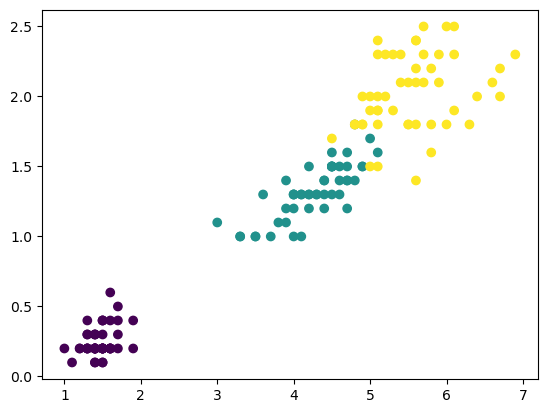

In [2]:

import numpy as np
from matplotlib import pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()


In [3]:

k = 3
random_index = np.random.choice(range(len(X)), k)
centroids = X[random_index]

In [4]:
random_index

array([ 48,  57, 119])

In [5]:
centroids

array([[1.5, 0.2],
       [3.3, 1. ],
       [5. , 1.5]])

In [6]:
print(X[[0,2]])

[[1.4 0.2]
 [1.3 0.2]]


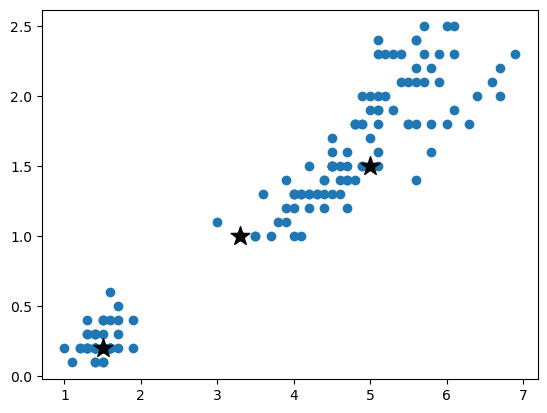

In [7]:

def visualize_centroids(X, centroids):
    plt.scatter(X[:, 0], X[:, 1])
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')
    plt.show()


visualize_centroids(X, centroids)

In [8]:

def dist(a, b):
    return np.linalg.norm(a - b, axis=1)


In [9]:

def assign_cluster(x, centroids):
    distances = dist(x, centroids)
    cluster = np.argmin(distances)
    return cluster

In [10]:
a = X[0] - centroids
print(a)
print(np.linalg.norm(a, axis = 1))


[[-0.1  0. ]
 [-1.9 -0.8]
 [-3.6 -1.3]]
[0.1        2.06155281 3.82753184]


In [11]:

def update_centroids(X, centroids, clusters):
    for i in range(k):
        cluster_i = np.where(clusters == i)
        centroids[i] = np.mean(X[cluster_i], axis=0)

In [12]:

clusters = np.zeros(len(X))

tol = 0.0001
max_iter = 100

iter = 0
centroids_diff = 100000

Iteration: 1
Centroids:
 [[1.462      0.246     ]
 [3.77368421 1.15263158]
 [5.17160494 1.79876543]]
Centroids move: 0.6082


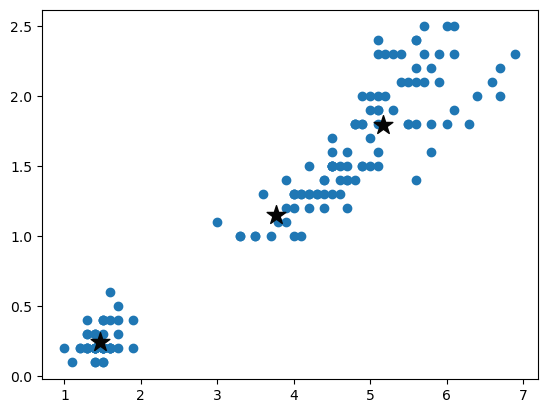

Iteration: 2
Centroids:
 [[1.462      0.246     ]
 [3.97333333 1.21333333]
 [5.30571429 1.87428571]]
Centroids move: 0.2593


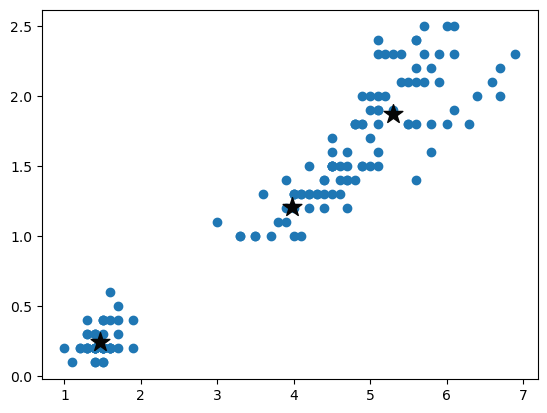

Iteration: 3
Centroids:
 [[1.462      0.246     ]
 [4.15348837 1.28837209]
 [5.47368421 1.96842105]]
Centroids move: 0.2742


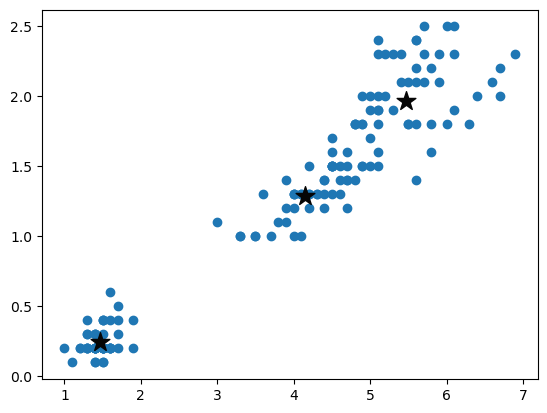

Iteration: 4
Centroids:
 [[1.462      0.246     ]
 [4.19130435 1.30217391]
 [5.51481481 1.99444444]]
Centroids move: 0.0632


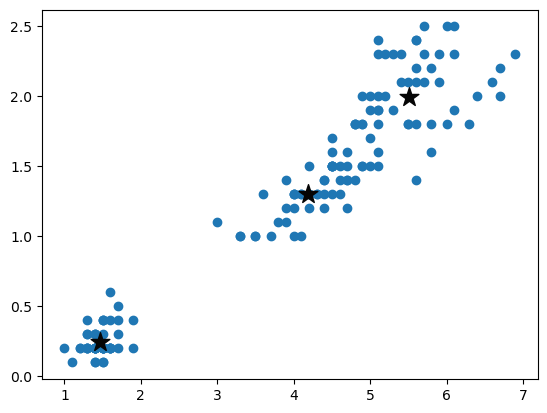

Iteration: 5
Centroids:
 [[1.462      0.246     ]
 [4.22083333 1.31041667]
 [5.53846154 2.01346154]]
Centroids move: 0.0431


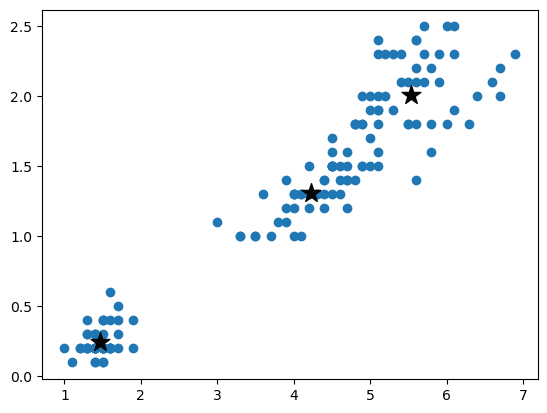

Iteration: 6
Centroids:
 [[1.462      0.246     ]
 [4.25490196 1.33921569]
 [5.58367347 2.02653061]]
Centroids move: 0.0648


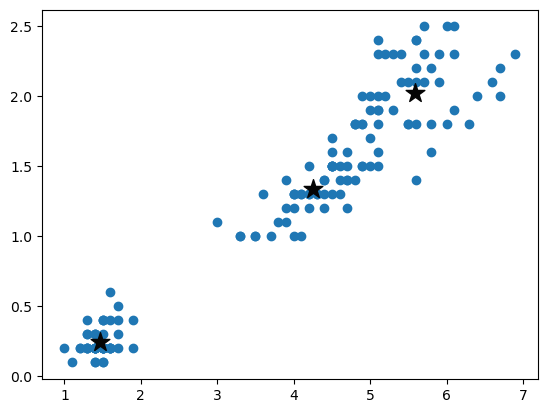

Iteration: 7
Centroids:
 [[1.462      0.246     ]
 [4.26923077 1.34230769]
 [5.59583333 2.0375    ]]
Centroids move: 0.0220


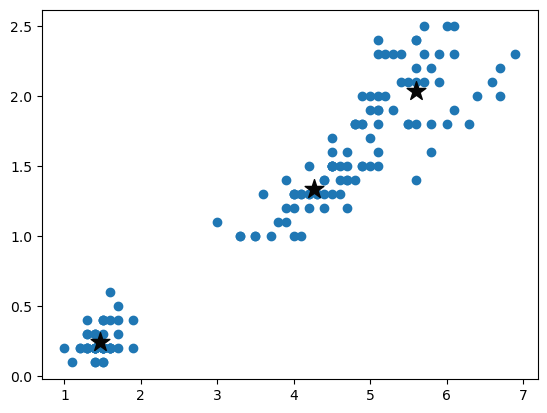

Iteration: 8
Centroids:
 [[1.462      0.246     ]
 [4.26923077 1.34230769]
 [5.59583333 2.0375    ]]
Centroids move: 0.0000


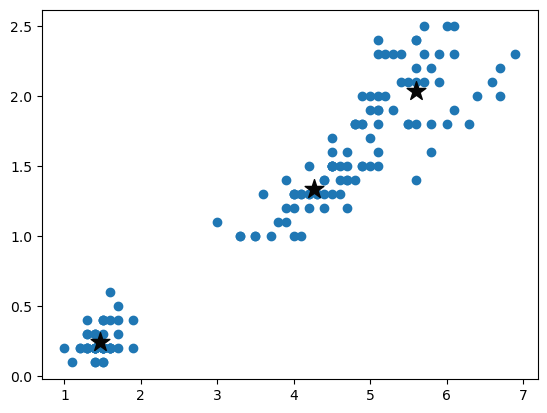

In [13]:

from copy import deepcopy
while iter < max_iter and centroids_diff > tol:
    for i in range(len(X)):
        clusters[i] = assign_cluster(X[i], centroids)
    centroids_prev = deepcopy(centroids)
    update_centroids(X, centroids, clusters)
    iter += 1
    centroids_diff = np.linalg.norm(centroids - centroids_prev)
    print('Iteration:', str(iter))
    print('Centroids:\n', centroids)
    print('Centroids move: {:5.4f}'.format(centroids_diff))
    visualize_centroids(X, centroids)

In [14]:
mat = np.array([[ 4],
               [3]])
 
# compute norm of matrix
mat_norm = np.linalg.norm(mat)
 
print("Matrix norm:")
print(mat_norm)

Matrix norm:
5.0


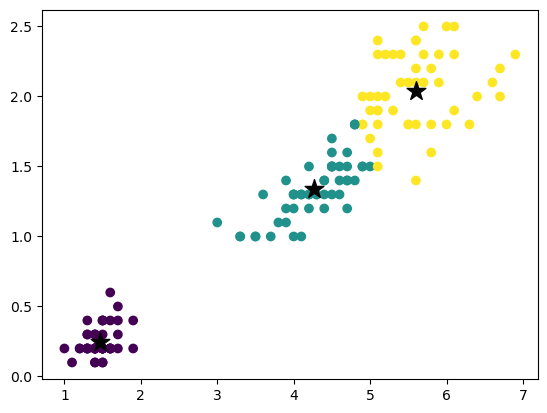

In [15]:

plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')
plt.show()

In [16]:

from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, 2:4]
y = iris.target

from matplotlib import pyplot as plt

k = 3

/Users/liamalkhatib/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


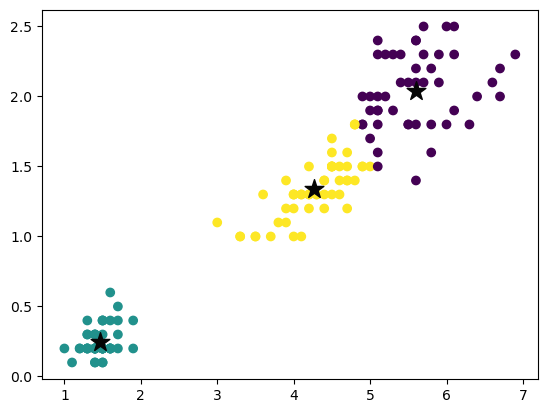

In [17]:

from sklearn.cluster import KMeans
kmeans_sk = KMeans(n_clusters=3, random_state=42)
kmeans_sk.fit(X)
clusters_sk = kmeans_sk.labels_
centroids_sk = kmeans_sk.cluster_centers_


plt.scatter(X[:, 0], X[:, 1], c=clusters_sk)
plt.scatter(centroids_sk[:, 0], centroids_sk[:, 1], marker='*', s=200, c='#050505')
plt.show()

In [18]:
from sklearn import datasets
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot as plt


In [19]:

iris = datasets.load_iris()
X = iris.data
y = iris.target


k_list = list(range(1, 7))
sse_list = [0] * len(k_list)


In [20]:

for k_ind, k in enumerate(k_list):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    clusters = kmeans.labels_
    centroids = kmeans.cluster_centers_

    sse = 0
    for i in range(k):
        cluster_i = np.where(clusters == i)

        sse += np.linalg.norm(X[cluster_i] - centroids[i])

    print('k={}, SSE={}'.format(k, sse))
    sse_list[k_ind] = sse


k=1, SSE=26.10307644703973
k=2, SSE=16.469773740281195
k=3, SSE=15.089477089696558
k=4, SSE=15.030732170749097
k=5, SSE=14.883951569291023
k=6, SSE=14.883090350867239


/Users/liamalkhatib/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/liamalkhatib/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/liamalkhatib/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/liamalkhatib/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

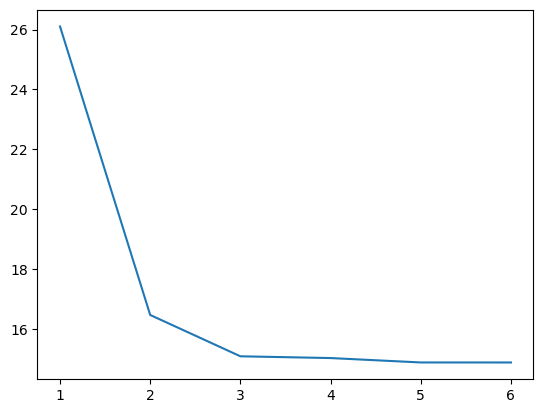

In [21]:
from matplotlib import pyplot as plt
plt.plot(k_list, sse_list)
plt.show()